In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

In [ ]:
diabetes = load_diabetes() #bộ dữ liệu bệnh tiểu đường, 
X, y = diabetes.data, diabetes.target.reshape(-1, 1) #y 1 cột, 442 hàng
#diabetes.data: ma trận mẫu (features), với mỗi hàng tương ứng với một bệnh nhân 
#và mỗi cột là một đặc trưng (tổng cộng có 10 đặc trưng)
scaler_X = StandardScaler() 
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)


In [3]:
def cost_function(X, y, w):
    m = len(y)
    y_pred = X.dot(w)
    cost = np.sum((y_pred - y) ** 2)/(2 * m)
    return cost

In [4]:
def gradient(X,y,w):
    m=len(y)
    y_pred = X.dot(w)
    dw= (1/m) * np.dot(X.T, (y_pred - y))
    return dw

In [5]:
def train(X,y,learning_rate=0.001, epochs=1000):
    X = np.c_[np.ones(X.shape[0]), X]
    w = np.zeros((X.shape[1], 1))
    costs = []
    for i in range(epochs):
        dw=gradient(X,y,w)
        w=w-learning_rate*dw
        cost = cost_function(X, y, w)
        costs.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}: w = {w}")   
    plt.plot(range(epochs), costs)
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.title("Cost Function during Training")
    plt.show()    
    return w

Iteration 0: w = [[-1.46438919e-19]
 [ 1.87888751e-04]
 [ 4.30619985e-05]
 [ 5.86450134e-04]
 [ 4.41481759e-04]
 [ 2.12022481e-04]
 [ 1.74053587e-04]
 [-3.94789251e-04]
 [ 4.30452885e-04]
 [ 5.65882592e-04]
 [ 3.82483484e-04]]
Iteration 100: w = [[-1.53868873e-17]
 [ 1.48610364e-02]
 [ 1.20066620e-03]
 [ 5.19149516e-02]
 [ 3.83765516e-02]
 [ 1.57254246e-02]
 [ 1.19195552e-02]
 [-3.36535276e-02]
 [ 3.51941145e-02]
 [ 4.89955203e-02]
 [ 3.18607609e-02]]
Iteration 200: w = [[-2.98690183e-17]
 [ 2.33304493e-02]
 [-2.21385728e-03]
 [ 9.16795937e-02]
 [ 6.65966246e-02]
 [ 2.28783501e-02]
 [ 1.54238073e-02]
 [-5.72695488e-02]
 [ 5.74075217e-02]
 [ 8.47755978e-02]
 [ 5.29234013e-02]]
Iteration 300: w = [[-4.32894042e-17]
 [ 2.77555064e-02]
 [-8.36612025e-03]
 [ 1.23178713e-01]
 [ 8.80110212e-02]
 [ 2.48543681e-02]
 [ 1.39333751e-02]
 [-7.42423790e-02]
 [ 7.13418348e-02]
 [ 1.11826157e-01]
 [ 6.69129466e-02]]
Iteration 400: w = [[-5.53692336e-17]
 [ 2.95725199e-02]
 [-1.60496378e-02]
 [ 1.48670

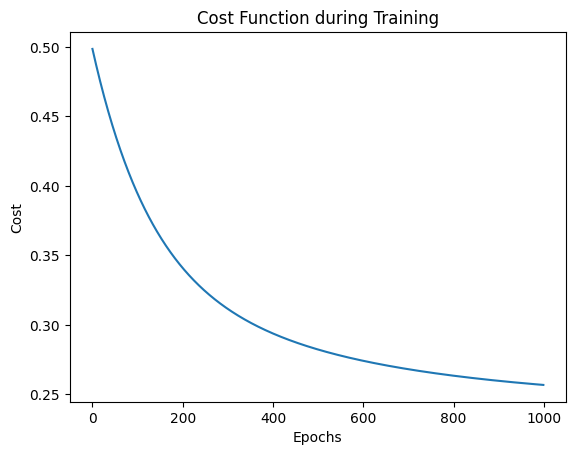

[[-1.05336554e-16]
 [ 2.16578001e-02]
 [-6.52712042e-02]
 [ 2.36777811e-01]
 [ 1.55618800e-01]
 [ 6.93281543e-04]
 [-2.80997109e-02]
 [-1.17505959e-01]
 [ 8.79987096e-02]
 [ 1.99728489e-01]
 [ 8.84071192e-02]]


In [6]:
w_opt = train(X_scaled,y_scaled)
print(w_opt)